# 遺伝形質と極性
- [sentence-transformers/stsb-xlm-r-multilingual](https://huggingface.co/sentence-transformers/stsb-xlm-r-multilingual)

In [7]:
# ポジネガ半分ずつ1
PN1 = [
  "ありがたさ", "豪華さ", "リフレッシュ", "安心", "意匠性","逸材","栄光","温もり","結婚","陽気","遊び心","優しさ", "冒険心", "華やかさ","想像力",
  "曖昧さ","いざこざ","いたずら","うつ病","哀れみ","威圧感","陰口","過疎","絵空事","寒さ","汗だく","危険","気まずさ","偽善","恐ろしさ"
]

/Users/yoshino/src/github.com/yoshino/generative-model-chat-topic-evolution/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


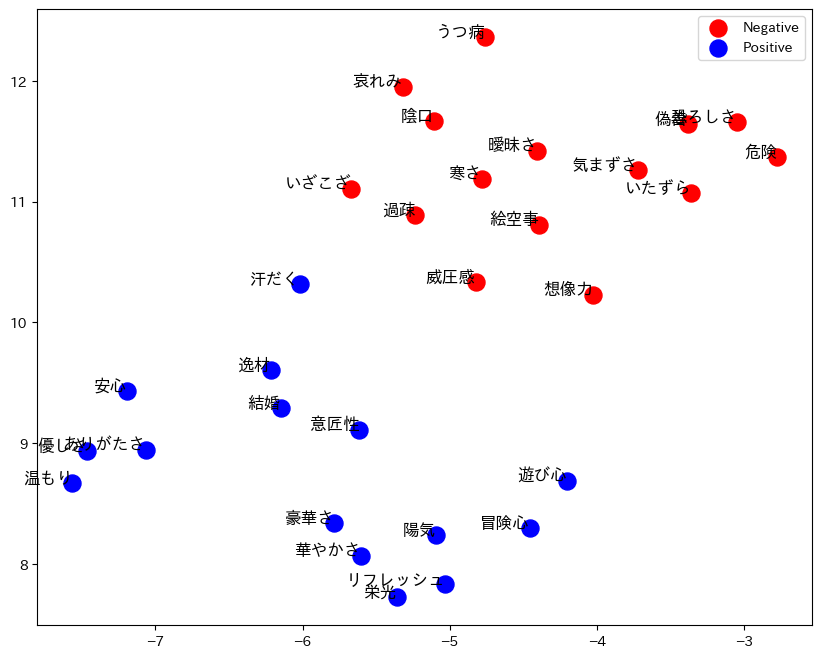

In [9]:
from sentence_transformers import SentenceTransformer
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. stsb-xlm-r-multilingualモデルのロード
model = SentenceTransformer('stsb-xlm-r-multilingual')

# 3. 単語をベクトルに変換
word_embeddings = model.encode(PN1)

# 4. UMAPで2次元に圧縮
umap_embeddings = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine').fit_transform(word_embeddings)

# 5. KMeansクラスタリングで2つのグループに分ける
clusters = KMeans(n_clusters=2).fit_predict(umap_embeddings)

# 6. 2次元のUMAP結果を2つの色でプロット
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[clusters == 0][:, 0], umap_embeddings[clusters == 0][:, 1], s=150, color='red', label='Negative')
plt.scatter(umap_embeddings[clusters == 1][:, 0], umap_embeddings[clusters == 1][:, 1], s=150, color='blue', label='Positive')
for i, word in enumerate(PN1):
    plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), fontsize=12, ha="right")
plt.legend()
plt.show()